In [33]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import requests

import torchvision
from torchvision import  transforms 
import torch
from torch import no_grad


from colorama import Fore
from colorama import Style

In [51]:
labels = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', ',', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(labels)

91

In [36]:
def get_predictions(pred, threshold=0.8, objects=None):
    
    predicted_classes = [(labels[i], p, [(box[0], box[1]), (box[2], box[3])]) 
    for i, p, box in zip(list(pred[0]['labels'].numpy()), pred[0]['scores'].detach().numpy(),
                         list(pred[0]['boxes'].detach().numpy()))]

    predicted_classes = [stuff for stuff in predicted_classes if stuff[1] > threshold]
    
    if objects and predicted_classes:
        predicted_classes = [(name, p, box) 
        for name, p, box in predicted_classes if name in objects]

    return predicted_classes

In [72]:
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):

    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:
      
      label = predicted_class[0]
      acc = predicted_class[1]
      box = predicted_class[2]

      a = round(box[0][0].tolist())
      b = round(box[0][1].tolist())
      c = round(box[1][0].tolist())
      d = round(box[1][1].tolist())

      print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
      print(f"Accuracy: {acc}")

      # Drawing rectangle and adding text on the picture based on their class and size.
      cv2.rectangle(image, (a, b), (c, d), (0, 255, 0), rect_th)
      cv2.rectangle(image, (a, b), (a + 110, b + 17), (255, 255, 255), -1)

      cv2.putText(image, label, (a + 10, b + 12),  cv2.FONT_HERSHEY_SIMPLEX, 
                  text_size, (0,255,0), thickness=text_th)

      cv2.putText(image, label+": "+str(round(acc, 2)), 
                  (a + 10, b + 12),  cv2.FONT_HERSHEY_SIMPLEX, text_size, 
                  (0, 255, 0),thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    plt.show()

In [38]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print('done!')

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


done!


In [39]:
def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

In [67]:
transform = transforms.Compose([transforms.ToTensor()])

img = transform(image)
pred = model([img])

index=pred[0]['labels'][0].item()
labels[index]

'person'

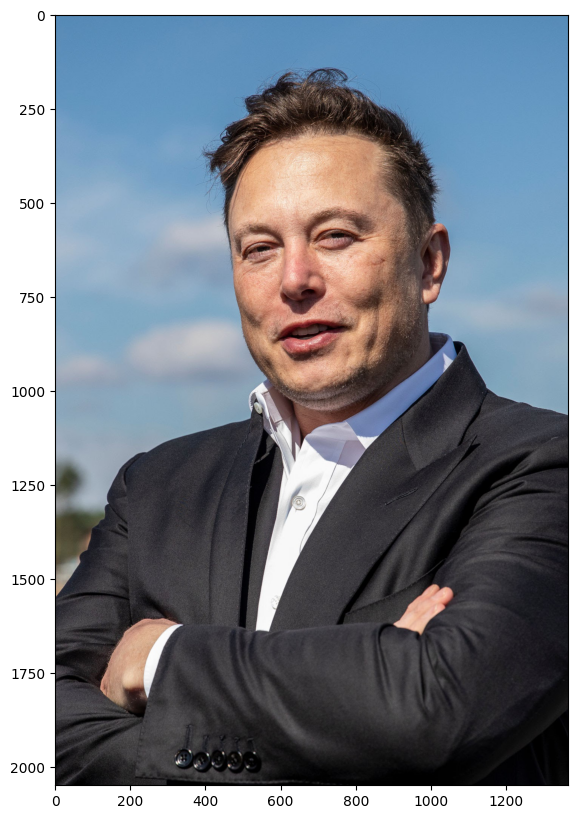

In [68]:
sample1 = '/content/elon.jpg'
half = 0.5
image = Image.open(sample1)

image.resize([int(half * s) for s in image.size] )
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()


Label: person
Accuracy: 0.9983137845993042


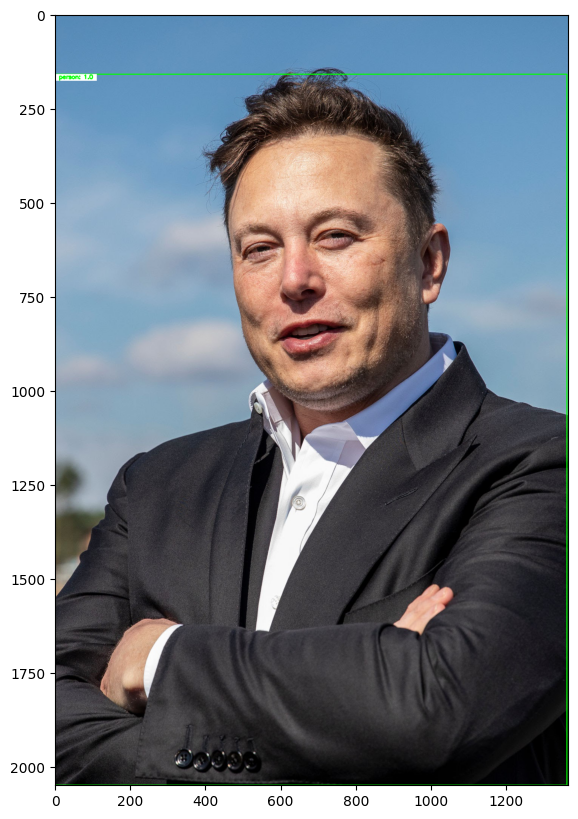

In [69]:
pred_class=get_predictions(pred, objects="person")
draw_box(pred_class, img)

del pred_class

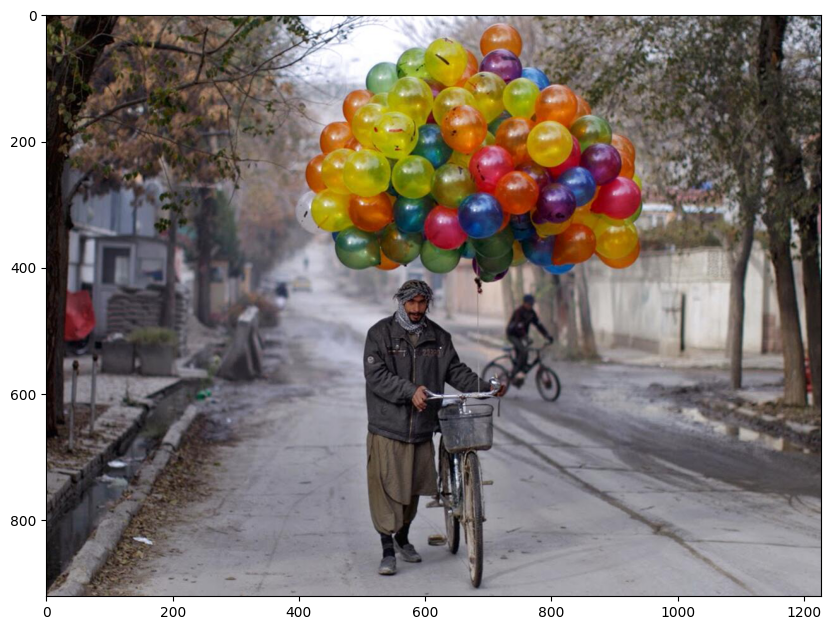

In [70]:
sample2 = '/content/4-1.jpg'
image = Image.open(sample2)

plt.figure(figsize = (10, 15))
plt.imshow(np.array(image))
plt.show()


Label: person
Accuracy: 0.9994028806686401

Label: person
Accuracy: 0.9921787977218628

Label: bicycle
Accuracy: 0.9883308410644531

Label: bicycle
Accuracy: 0.9863827228546143


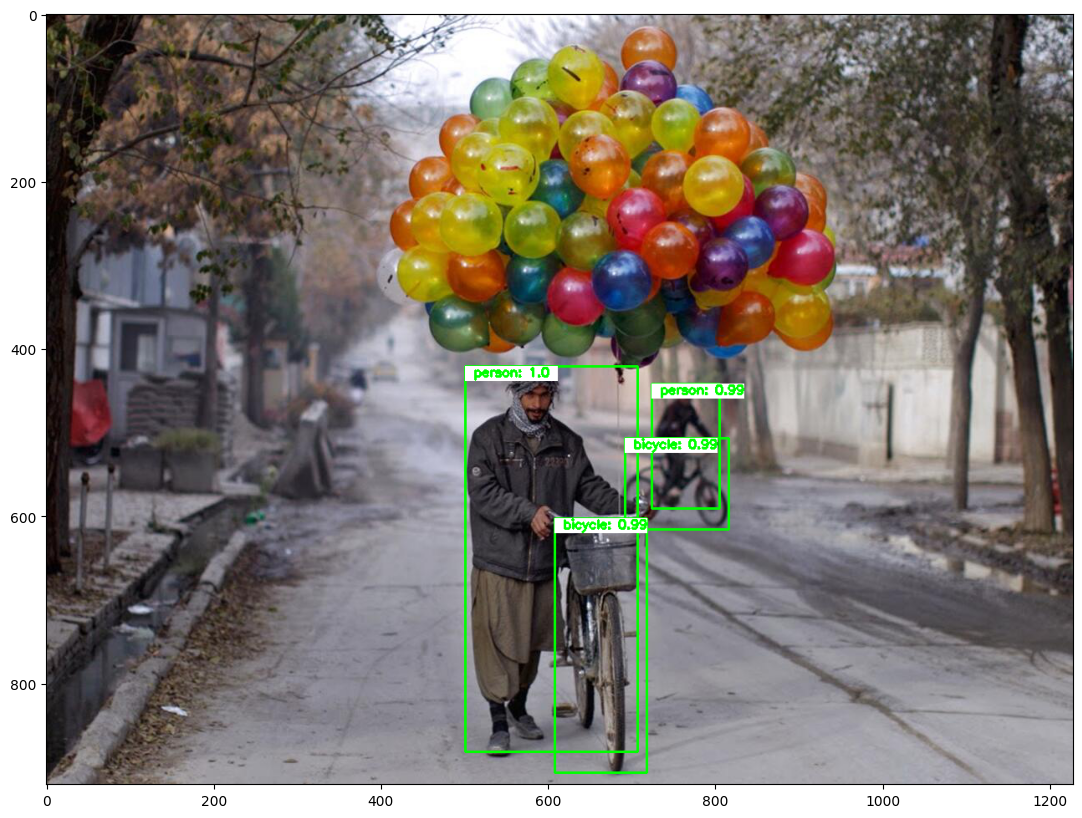

In [71]:
img = transform(image )
pred = model(img.unsqueeze(0))
pred_thresh=get_predictions(pred,threshold=0.95)

draw_box(pred_thresh, img, download_image=True, img_name="predicted")